In [35]:
# Chi square for statistical significant difference
# p-value and the NULL hypothesis

# Assume a 2 groups of students (last year and this year) and grades

#         A      B     C
# old    26     13     5      
# new    20     29     7     


# Are the greades dependent on the new or old students?
# NULL hypothesis: all the same / independent
# chi-square to decide if we will REJECT the null hypothesis

# x^2 = Sum [ (O-E)^2 / E ] 
# where O: observation, E: expected value

# Expected frequencies:
# e_ij = (count(A=a_i) x count(B=b_j)) / n
# example: (old, A) = (44x46 / 100) = 20.24


from scipy.stats import chi2_contingency
from scipy.stats import chi2

table = [
    [26, 13, 5],
    [20, 29, 7]
]

stat, p, dof, expected = chi2_contingency(table)
print(f'Degrees of freedom (dof) = {dof}')
print(f'x^2 = {stat}')
print(f'p = {p}')
print('\nExpected values:')
print(expected)
print('')

alpha = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (alpha, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Degrees of freedom (dof) = 2
x^2 = 5.855499314350247
p = 0.05351733509077522

Expected values:
[[20.24 18.48  5.28]
 [25.76 23.52  6.72]]

probability=0.950, critical=5.991, stat=5.855
Independent (fail to reject H0)


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


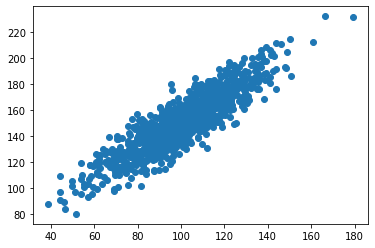

In [36]:
# Define a dataset

# We will generate 1,000 samples of two variables with a strong positive correlation. 
# First variable: random numbers drawn from a Gaussian distribution: mean 100, SD 20. 
# Second variable: values from the first variable with Gaussian noise added: mean 50, SD 10.

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# Set seed for random number generation
seed(1)

# Generate data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# Summarize data
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# Plot data
pyplot.scatter(data1, data2)
pyplot.show()

In [37]:
# The relationship between two variables can be summarized: this is called covariance
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

# Use of the mean: suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

# The sign of the covariance:
#    whether the two variables change in the same direction (positive) 
#    or change in different directions (negative)

# A covariance value of zero indicates that both variables are completely independent.

from numpy import cov

covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [38]:
# Covariance = 389.73

#      X           Y
# X  var(X)     cov(X,Y)
# Y  cov(X,Y)   var(Y)

In [39]:
# Calculate Pearson's correlation

# Calculated as the covariance of the two variables 
# divided by the product of the standard deviation of each data sample. 
# It is the normalization of the covariance between the two variables to give an interpretable score.

# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [40]:
# This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

In [41]:
# Calculate Spearman's correlation
from scipy.stats import spearmanr

corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872
